# Predict Price of Airbnb Listing

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
import math
from math import sqrt
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


# Data Cleaning

This presents the proportion of missing values within each column.

In [4]:
train.isnull().mean()

id                                  0.000000
name                                0.000358
summary                             0.037927
space                               0.313078
description                         0.009184
experiences_offered                 0.000000
neighborhood_overview               0.405212
notes                               0.599052
transit                             0.379927
access                              0.424414
interaction                         0.443318
house_rules                         0.404168
host_id                             0.000000
host_name                           0.000149
host_since                          0.000149
host_location                       0.003399
host_about                          0.392510
host_response_time                  0.482825
host_response_rate                  0.482825
host_acceptance_rate                1.000000
host_is_superhost                   0.000149
host_neighbourhood                  0.140318
host_listi

Here we start with analyzing heat maps in order to produce a list of features which most closely affect the price column.  The columns presented are before and after some columns are dropped.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# creates heat map
data = train

# gets correlation
correlation = data.corr()

plt.subplots(figsize=(data.shape[1],data.shape[1]))

# create the heatmap
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot=True,
    # changes colors of heatmap to make easier to read
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# rotate the x tic labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [6]:
top_twenty = abs(correlation['price'][:-1])

lst = []
for i in range(20):
    lst.append(top_twenty.idxmax())
    top_twenty = top_twenty.drop(top_twenty.idxmax())

# lst presents best columns before cleaning
lst[1:]

['accommodates',
 'beds',
 'bedrooms',
 'square_feet',
 'guests_included',
 'bathrooms',
 'review_scores_location',
 'calculated_host_listings_count',
 'host_listings_count',
 'review_scores_cleanliness',
 'review_scores_rating',
 'number_of_reviews',
 'review_scores_value',
 'minimum_nights',
 'host_id',
 'id',
 'review_scores_checkin',
 'review_scores_accuracy',
 'review_scores_communication']

Now I chose to drop the following columns due to various reasons such as too many missing values or the feature is irrelevant.

In [7]:
train.drop(columns=['name', 'host_id', 'id', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about', 'host_acceptance_rate', 'square_feet', 'is_business_travel_ready', 'experiences_offered'], inplace=True)
test.drop(columns=['name', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about', 'host_acceptance_rate', 'square_feet', 'is_business_travel_ready', 'experiences_offered'], inplace=True)

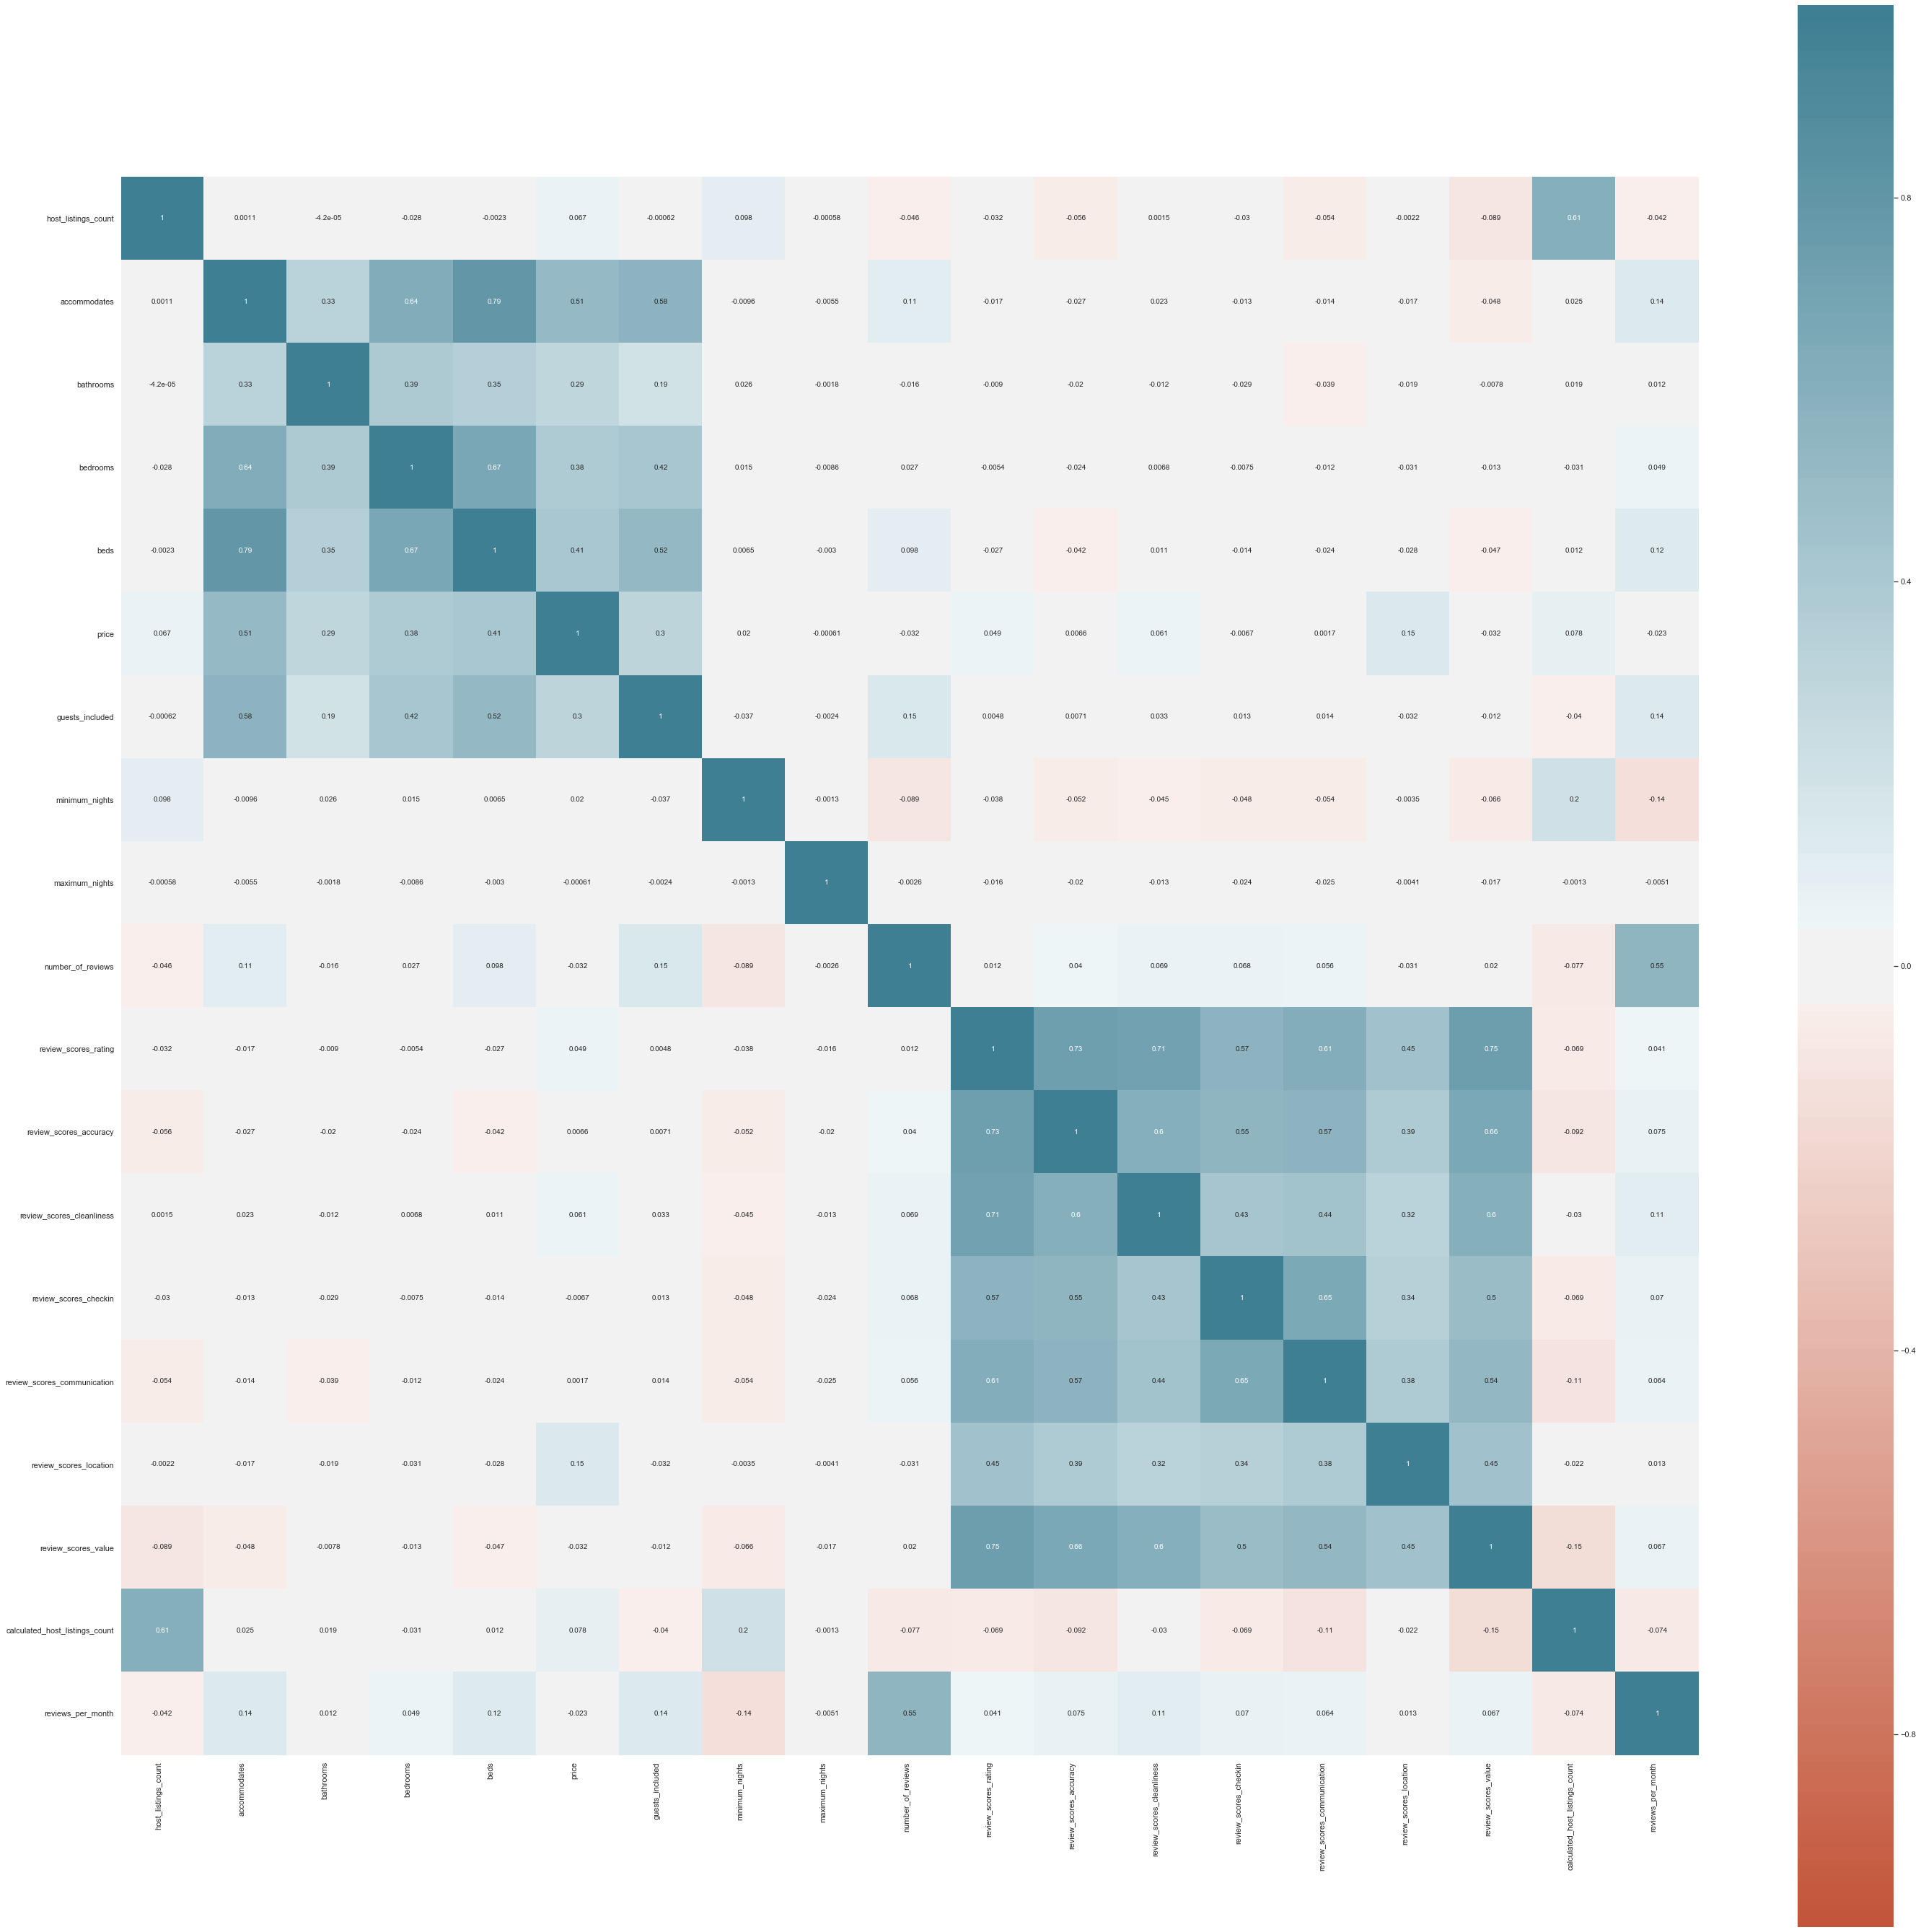

In [8]:
# creates heat map

data = train

# gets correlation
correlation = data.corr()

plt.subplots(figsize=(data.shape[1],data.shape[1]))

# create the heatmap
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot=True,
    # changes colors of heatmap to make easier to read
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# rotate the x tic labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [9]:
top_eighteen = abs(correlation['price'][:-1])

lst = []
for i in range(18):
    lst.append(top_eighteen.idxmax())
    top_eighteen = top_eighteen.drop(top_eighteen.idxmax())

# lst presents best columns to use after cleaning
lst[1:]

['accommodates',
 'beds',
 'bedrooms',
 'guests_included',
 'bathrooms',
 'review_scores_location',
 'calculated_host_listings_count',
 'host_listings_count',
 'review_scores_cleanliness',
 'review_scores_rating',
 'number_of_reviews',
 'review_scores_value',
 'minimum_nights',
 'review_scores_checkin',
 'review_scores_accuracy',
 'review_scores_communication',
 'maximum_nights']

# Impute Missing Values
For this part, I begin to impute missing values in various ways.  Since I chose to use XGBoost for my final model, I wanted to impute by median value since XGBoost performs more accurately when doing so.  During my data cleaning I did try imputing in different ways such as by distribution, however the result was much less accurate in comparison to imputing by median.

In [10]:
review_scores_clean_tr = train['review_scores_value'].median()
train['review_scores_value'] = train['review_scores_value'].fillna(review_scores_clean_tr)
review_scores_clean_te = test['review_scores_value'].median()
test['review_scores_value'] = test['review_scores_value'].fillna(review_scores_clean_te)

review_scores_checkin_train = train['review_scores_checkin'].median()
train['review_scores_checkin'] = train['review_scores_checkin'].fillna(review_scores_checkin_train)
review_scores_checkin_test = test['review_scores_checkin'].median()
test['review_scores_checkin'] = test['review_scores_checkin'].fillna(review_scores_checkin_test)

review_acc_train = train['review_scores_accuracy'].median()
train['review_scores_accuracy'] = train['review_scores_accuracy'].fillna(review_acc_train)
review_acc_test = test['review_scores_accuracy'].median()
test['review_scores_accuracy'] = test['review_scores_accuracy'].fillna(review_acc_test)

review_scores_tr = train['review_scores_communication'].median()
train['review_scores_communication'] = train['review_scores_communication'].fillna(review_scores_tr)
review_scores_te = test['review_scores_communication'].median()
test['review_scores_communication'] = test['review_scores_communication'].fillna(review_scores_te)

review_rating_tr = train['review_scores_rating'].median()
train['review_scores_rating'] = train['review_scores_rating'].fillna(review_rating_tr)
review_rating_te = test['review_scores_rating'].median()
test['review_scores_rating'] = test['review_scores_rating'].fillna(review_rating_te)

review_scores_clean_tr = train['review_scores_cleanliness'].median()
train['review_scores_cleanliness'] = train['review_scores_cleanliness'].fillna(review_scores_clean_tr)
review_scores_clean_te = test['review_scores_cleanliness'].median()
test['review_scores_cleanliness'] = test['review_scores_cleanliness'].fillna(review_scores_clean_te)

ave_review_scores_train = train['review_scores_location'].median()
train.review_scores_location = train['review_scores_location'].fillna(ave_review_scores_train)
ave_review_scores_test = test['review_scores_location'].median()
test.review_scores_location = test['review_scores_location'].fillna(ave_review_scores_test)

host_listings_med_train = train['host_listings_count'].median()
train['host_listings_count'] = train['host_listings_count'].fillna(host_listings_med_train)
host_listings_med_test = test['host_listings_count'].median()
test['host_listings_count'] = test['host_listings_count'].fillna(host_listings_med_test)

median_train_bathrooms = train.bathrooms.median()
train['bathrooms'] = train['bathrooms'].fillna(median_train_bathrooms)
median_test_bathrooms = test.bathrooms.median()
test['bathrooms'] = test['bathrooms'].fillna(median_test_bathrooms)

median_train_beds = train.beds.median()
train['beds'] = train['beds'].fillna(median_train_beds)
median_test_beds = test.beds.median()
test['beds'] = test['beds'].fillna(median_test_beds)

This code changes t,f values to be True or False values.  Missing values are changed to false because we assume that they are not required by the host.

In [11]:
def helper(row):
#     print(row)
    if row == 't':
        return True
    else:
        return False

train['host_is_superhost'] = train['host_is_superhost'].apply(helper)
train['host_identity_verified'] = train['host_identity_verified'].apply(helper)
train['host_has_profile_pic'] = train['host_has_profile_pic'].apply(helper)
train['require_guest_profile_picture'] = train['require_guest_profile_picture'].apply(helper)
train['instant_bookable'] = train['instant_bookable'].apply(helper)
train['require_guest_phone_verification'] = train['require_guest_phone_verification'].apply(helper)

test['host_is_superhost'] = test['host_is_superhost'].apply(helper)
test['host_identity_verified'] = test['host_identity_verified'].apply(helper)
test['host_has_profile_pic'] = test['host_has_profile_pic'].apply(helper)
test['require_guest_profile_picture'] = test['require_guest_profile_picture'].apply(helper)
test['instant_bookable'] = test['instant_bookable'].apply(helper)
test['require_guest_phone_verification'] = test['require_guest_phone_verification'].apply(helper)


# replace nans with 0 because assume 0 reviews per month
# reviews_per_month

def nans(row):
#     print(row)
    if pd.isnull(row):
        return 0
    else:
        return row
    
train['reviews_per_month'] = train['reviews_per_month'].apply(nans)
train['host_listings_count'] = train['host_listings_count'].apply(nans)

test['reviews_per_month'] = test['reviews_per_month'].apply(nans)
test['host_listings_count'] = test['host_listings_count'].apply(nans)


train['state'] = train['state'].str.upper()
test['state'] = test['state'].str.upper()

def ny_nans(row):
    if pd.isnull(row):
        return 'New York'
    else:
        return row

train['city'] = train['city'].apply(ny_nans)
test['city'] = test['city'].apply(ny_nans)

def beds(row):
    if pd.isnull(row):
        return 1
    else:
        return row

train['bedrooms'] = train['bedrooms'].apply(beds)
test['bedrooms'] = test['bedrooms'].apply(beds)


train['extra_people'] = train['extra_people'].apply(lambda x: x.replace('$', ''))
train['extra_people'] = train['extra_people'].apply(lambda x: float(x))
test['extra_people'] = test['extra_people'].apply(lambda x: x.replace('$', ''))
test['extra_people'] = test['extra_people'].apply(lambda x: float(x))

In [12]:
train['host_response_time'].unique()

def ordinal_encode(row):
    response_time_order = {'within an hour': 5, 'within a few hours': 4, 'within a day': 3, \
                           'a few days or more': 2, np.NaN: 1}
    
    if row in response_time_order:
        return response_time_order[row]
    
train['host_response_time'] = train['host_response_time'].apply(ordinal_encode)
test['host_response_time'] = test['host_response_time'].apply(ordinal_encode)

In [13]:
train['room_type'].unique()

def ordinal_encode(row):
    room = {'Entire home/apt': 3, 'Private room': 2, 'Shared room': 1}
    
    if row in room:
        return room[row]
    
train['room_type'] = train['room_type'].apply(ordinal_encode)
test['room_type'] = test['room_type'].apply(ordinal_encode)

In [14]:
def amenities_helper(row):
    lst = row[1:-1].split(',')
    return [i.replace('"', '') for i in lst]

train['amenities'] = train.amenities.apply(amenities_helper)
# test['amenities'] = test.amenities.apply(amenities_helper)

amenities = list(train['amenities'])
unique_amenities = set(x for i in amenities for x in i)
# print(unique_amenities)
  
# pd.get_dummies
amenities_df_train = pd.DataFrame()
for a in unique_amenities:
    amenities_df_train[a] = train['amenities'].apply(lambda x: 1 if a in x else 0)

# train['amenities'] = train.amenities.apply(amenities_helper)
test['amenities'] = test.amenities.apply(amenities_helper)
  
# pd.get_dummies
amenities_df_test = pd.DataFrame()
for a in unique_amenities:
    amenities_df_test[a] = test['amenities'].apply(lambda x: 1 if a in x else 0)

# amenities_df

train = pd.concat([train, amenities_df_train], axis=1)
test = pd.concat([test, amenities_df_test], axis=1)
# train


In [15]:
def verify_help(row):
    lst = row[1:-1].split(', ')
    string = [i.replace("'", "") for i in lst]
    return string
    
train['host_verifications'] = train['host_verifications'].apply(verify_help)
verify = train['host_verifications']

unique_verify = set(x for i in verify for x in i)
unique_verify.remove('')
unique_verify

verify_df_train = pd.DataFrame()
for a in unique_verify:
    verify_df_train[a] = train['host_verifications'].apply(lambda x: 1 if a in x else 0)
    
verify_df_train.drop(columns=['on'], axis =1, inplace= True)
train = pd.concat([train, verify_df_train], axis=1)

test['host_verifications'] = test['host_verifications'].apply(verify_help)
verify_te = test['host_verifications']

unique_verify_te = set(x for i in verify_te for x in i)
unique_verify_te.remove('')
unique_verify_te

verify_df_test = pd.DataFrame()
for a in unique_verify_te:
    verify_df_test[a] = test['host_verifications'].apply(lambda x: 1 if a in x else 0)
    
verify_df_test.drop(columns=['on'], axis =1, inplace= True)
test = pd.concat([test, verify_df_test], axis=1)


In [16]:
test.isnull().sum() / test.shape[0]

id                              0.000000
description                     0.009171
host_id                         0.000000
host_name                       0.000173
host_since                      0.000173
host_location                   0.002307
host_response_time              0.000000
host_response_rate              0.476553
host_is_superhost               0.000000
host_neighbourhood              0.140451
host_listings_count             0.000000
host_verifications              0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
neighbourhood_cleansed          0.000000
neighbourhood_group_cleansed    0.000000
city                            0.000000
state                           0.000173
zipcode                         0.016958
market                          0.002711
country_code                    0.000000
country                         0.000000
property_type                   0.000000
room_type                       0.000000
accommodates    

# Final Model

In [17]:
def airbnb_model(df):
    
    #categorical_columns
    cat_cols = ["property_type", 'city', 'room_type', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed']
    cat_transformer = Pipeline([('one-hot', OneHotEncoder(handle_unknown = 'ignore'))])
    
    # amenities has been one hot encoded, pass in as is
    amen_cols = ['Hot tub', 'Cooking basics', 'Ethernet connection', 'Fire extinguisher', 'Waterfront', \
                 'Patio or balcony', 'Wide entryway', 'Lockbox', 'Air purifier', 'Beach essentials', \
                 'Shower chair', 'Wifi', 'Firm mattress', 'Wide hallway clearance', 'Window guards', \
                 'Shampoo', 'Long term stays allowed', 'Other pet(s)', 'Wide clearance to bed', 'Dishwasher', \
                 'Family/kid friendly', 'Room-darkening shades', 'Pocket wifi', 'Step-free access', \
                 'First aid kit', 'Children’s books and toys', 'BBQ grill', 'Hot water kettle', 'Wide doorway', \
                 'Laptop friendly workspace', 'Indoor fireplace', 'Oven', 'TV', ' toilet', 'Bathtub', 'Pets allowed', \
                 'Bed linens', 'Heating', 'Dishes and silverware', 'Suitable for events', 'Host greets you', \
                 'Hot water', 'Free street parking', 'Gym', 'Building staff', \
                 'translation missing: en.hosting_amenity_50', 'Single level home', 'Babysitter recommendations', \
                 'Pool', 'Dog(s)', 'Fixed grab bars for shower', 'Dryer', 'EV charger', 'Smoke detector', \
                 'Extra pillows and blankets', 'Private bathroom', 'Stair gates', 'Smoking allowed', \
                 'Handheld shower head', 'Paid parking off premises', 'Stove', 'Ski-in/Ski-out', \
                 'Disabled parking spot', 'Outlet covers', 'Essentials', 'Paid parking on premises', \
                 'Luggage dropoff allowed', 'Safety card', 'Table corner guards', 'Baby monitor', \
                 'Pool with pool hoist', 'Washer', 'Cleaning before checkout', 'Keypad', 'Wheelchair accessible', \
                 'Electric profiling bed', 'Well-lit path to entrance', 'Private living room', 'Other', \
                 'Lock on bedroom door', 'Fireplace guards', 'Pack ’n Play/travel crib', 'Carbon monoxide detector', \
                 'Hair dryer', 'Lake access', 'Internet', 'Air conditioning', 'Breakfast', 'Elevator', \
                 'Kitchen', 'Microwave', 'Washer / Dryer', 'Pets live on this property', 'Roll-in shower', \
                 'Garden or backyard', 'translation missing: en.hosting_amenity_49', 'Hangers', 'Ground floor access', \
                 'Doorman', 'Coffee maker', 'Flat path to front door', 'Children’s dinnerware', \
                 'Free parking on premises', 'Full kitchen', 'Accessible-height toilet', 'Buzzer/wireless intercom', \
                 'Changing table', 'Wide clearance to shower', 'Crib', 'Fixed grab bars for toilet', \
                 'Smart lock', 'Game console', 'Refrigerator', 'Iron', 'Mobile hoist', 'Self check-in', \
                 'Cable TV', 'Cat(s)', 'Beachfront', '24-hour check-in', 'Baby bath', 'High chair', \
                 'Accessible-height bed', 'Private entrance', 'Bathtub with bath chair',\
                'email', 'weibo', 'offline_government_id', 'facebook', 'identity_manual', 'google', 'work_email', \
                 'manual_offline', 'sesame_offline', 'reviews', 'sesame', 'phone', 'manual_online', 'kba', \
                 'zhima_selfie', 'sent_id', 'jumio', 'selfie', 'government_id']
    
    
    # pass in these columns
    amen_transform = Pipeline([('func-transform', FunctionTransformer())])
    
    # pass in these columns
    accom_cols = ['accommodates', 'host_is_superhost', 'beds', 'bedrooms', 'bathrooms', 'guests_included', 'number_of_reviews', \
                  'review_scores_location', 'calculated_host_listings_count', 'host_listings_count', \
                 'extra_people', 'minimum_nights', 'review_scores_cleanliness','review_scores_value', 'host_response_time', \
                  'review_scores_checkin', 'review_scores_accuracy', 'review_scores_communication',\
                 'maximum_nights']
    
    accom_transform = Pipeline([('func-transformer', FunctionTransformer())])
    
    # column transformer
    preproc = ColumnTransformer(transformers=[('cat', cat_transformer, cat_cols), \
                                              ('amen', amen_transform, amen_cols),
                                              ('accom', accom_transform, accom_cols)
                                             ]) 
    
    # pipeline to return 
    pl = Pipeline(steps=[('preprocessor', preproc), ('lin-regress', xgb.XGBRegressor(colsample_bytree=0.7, \
                                                                                     gamma=0.2, learning_rate=0.1, \
                                                                                     max_depth=6, n_estimators=400,\
                                                                                     random_state=4))])

    
    # features, and predicted
    X = df.drop('price', axis=1)
    y = df['price']

    pl.fit(X, y)
    return pl

# rmse, test_rmse
airbnb_model(train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('one-hot',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                      

In [18]:
train_pred = airbnb_model(train).predict(train)
test_pred = airbnb_model(train).predict(test)

train_pred, test_pred

(array([171.39539 , 229.13597 , 144.51152 , ...,  72.727554,  82.171646,
        398.8179  ], dtype=float32),
 array([397.62622 , 123.423454,  52.03588 , ...,  95.66671 ,  60.584587,
        129.66197 ], dtype=float32))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train, train['price'], test_size=0.25)

train_pred = airbnb_model(X_train).predict(X_train)
train_rmse = sqrt(mean_squared_error(y_train, train_pred))

tester_pred = airbnb_model(X_train).predict(X_test)
tester_rmse = sqrt(mean_squared_error(y_test, tester_pred))

# train_rmse, tester_rmse
train_rmse, tester_rmse

(53.27764714059348, 91.79555710146116)

In [20]:
lin_pred = airbnb_model(train).predict(train)
whole_train_rmse = sqrt(mean_squared_error(train['price'], lin_pred))
whole_train_rmse

58.13788508960694

In [21]:
temp = pd.DataFrame()
temp['Id'] = test['id']
temp['Predicted'] = test_pred
temp.head()

,Id,Predicted
0,19307997,397.626221
1,20176193,123.423454
2,19485371,52.035881
3,13079990,59.730713
4,22339757,47.175529
